In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pickle
import pandas as pd
import sklearn as skl
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("/content/ipl_dataset.csv")

In [4]:
type(df)

pandas.core.frame.DataFrame

Cleaning the NaN values in the dataset

In [5]:
df.isnull().sum()

full_scorecard       0
team1                0
team2                8
team1_score         28
team2_score         10
toss_winner          8
toss_choice          0
winner               0
margin               0
man_of_the_match     8
stadium              8
place               84
dtype: int64

In [ ]:
new_df = df.fillna(0)
new_df

In [ ]:
new_df = df.fillna(method="ffill")
new_df

In [ ]:
new_df = df.fillna(method="ffill",limit=1)
new_df

In [32]:
new_df = df.fillna(method="bfill")

In [ ]:
new_df = df.interpolate() 
df 

In [ ]:
new_df = df.dropna()
new_df

In [ ]:
new_df = df.dropna(how='all')
new_df 

K-Means Clustering

In [29]:
new_df.info

<bound method DataFrame.info of                                         full_scorecard  \
0    https://stats.espncricinfo.com/ci/engine/match...   
1    https://stats.espncricinfo.com/ci/engine/match...   
2    https://stats.espncricinfo.com/ci/engine/match...   
3    https://stats.espncricinfo.com/ci/engine/match...   
4    https://stats.espncricinfo.com/ci/engine/match...   
..                                                 ...   
953  https://stats.espncricinfo.com/ci/engine/match...   
954  https://stats.espncricinfo.com/ci/engine/match...   
955  https://stats.espncricinfo.com/ci/engine/match...   
956  https://stats.espncricinfo.com/ci/engine/match...   
957  https://stats.espncricinfo.com/ci/engine/match...   

                           team1                  team2  team1_score  \
0            Chennai Super Kings  Kolkata Knight Riders        131.0   
1                 Mumbai Indians         Delhi Capitals        177.0   
2    Royal Challengers Bangalore           Punjab Kings

In [36]:
x=new_df.iloc[:,[3,4]].values
print(x)

[[131. 133.]
 [177. 179.]
 [205. 208.]
 ...
 [192.  87.]
 [112. 116.]
 [163. 164.]]


In [37]:
wcss=[]
for i in range(1,13):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=50)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<function matplotlib.pyplot.show(close=None, block=None)>

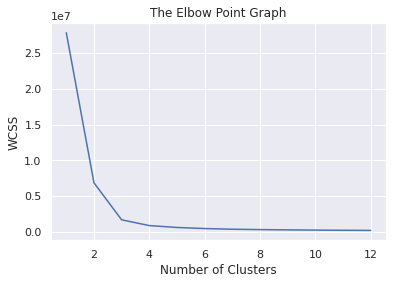

In [43]:
sns.set()
plt.plot(range(1,13),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

In [42]:
kmeans = KMeans(n_clusters=3,init='k-means++' ,random_state=0)

#return label for each datapoint based on clusters
y = kmeans.fit_predict(x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


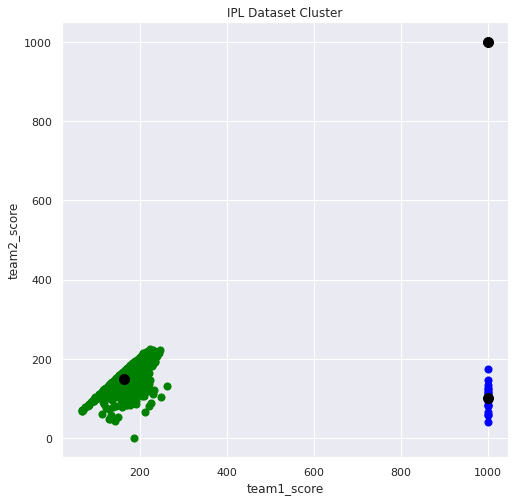

In [46]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50, c='green',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50, c='blue',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50, c='pink',label='Cluster 3')

#ploting centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.title('IPL Dataset Cluster')
plt.xlabel('team1_score')
plt.ylabel('team2_score')
plt.show()